<a href="https://colab.research.google.com/github/PedroH-07/Checkpoint1-SERS/blob/main/CP01_SERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd

In [30]:
df = pd.read_csv("/content/household_power_consumption.txt", sep=';')

/tmp/ipython-input-4025975215.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/household_power_consumption.txt", sep=';')


# **01 - Carregue o dataset e exibe as 10 primeiras linhas**

In [31]:
df.head(11)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


## **02 diferença entre Global_active_power e Global_reactive_power**

Global_active_power: Esta coluna representa a potência ativa total consumida pela residência em quilowatts (kW). A potência ativa é a potência real que realiza trabalho útil, como acender lâmpadas, fazer funcionar motores, etc. É a energia que você realmente "usa" e pela qual paga na sua conta de eletricidade.

Global_reactive_power: Esta coluna representa a potência reativa total consumida pela residência em quilovolt-ampère reativo (kVAr). A potência reativa é a potência que não realiza trabalho útil diretamente, mas é necessária para criar campos magnéticos em equipamentos como motores, transformadores e reatores. Ela não é convertida em trabalho, mas é necessária para que a potência ativa possa ser entregue.

## **03 Verifique se tem valores ausentes e quantifique-os**

In [32]:
missing_values = df.isnull().sum()
display(missing_values)

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


# **04 Converta a coluna Date para o tipo datetime e cria uma nova coluna com o dia da semana correspondente**

In [33]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['DayOfWeek'] = df['Date'].dt.day_name()
display(df.head())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DayOfWeek
0,2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,Saturday
1,2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,Saturday
2,2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,Saturday
3,2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,Saturday
4,2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,Saturday


# **05 Filtre os registros apenas do ano 2007 e calcule a média de consumo diário de Gblobal_active_power**

In [34]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df_2007 = df[df['Date'].dt.year == 2007]

daily_avg_power_2007 = df_2007.groupby('Date')['Global_active_power'].mean()
display(daily_avg_power_2007)

,Global_active_power
Date,
2007-01-01,1.909031
2007-01-02,0.881414
2007-01-03,0.704204
2007-01-04,2.263481
2007-01-05,1.884281
...,...
2007-12-27,1.758471
2007-12-28,2.161842
2007-12-29,2.290942


# **06. Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à sua escolha.**



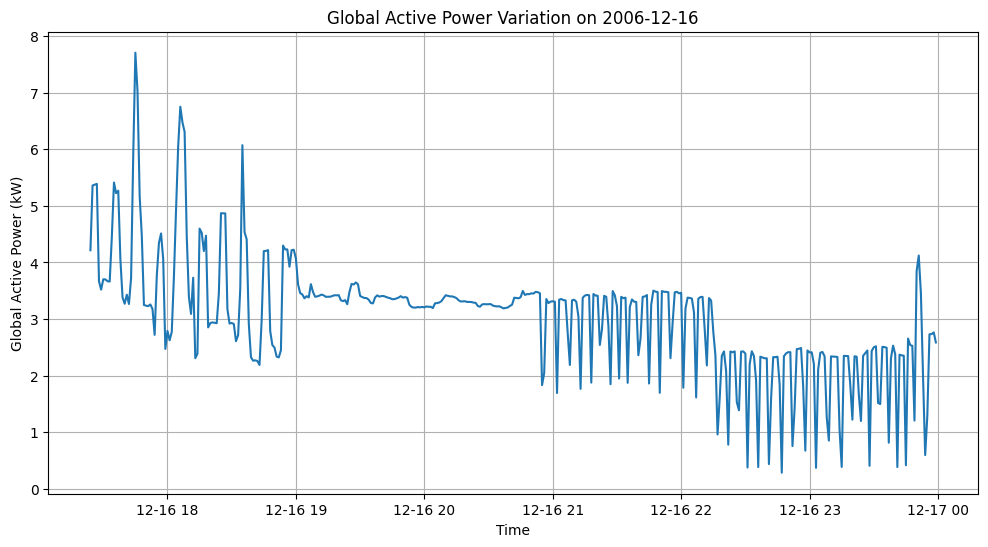

In [35]:
import matplotlib.pyplot as plt

# Choose a specific day (e.g., the first day in the dataset)
date_to_plot = df['Date'].iloc[0]
df_single_day = df[df['Date'] == date_to_plot].copy()

# Combine 'Date' and 'Time' columns for plotting
df_single_day['Datetime'] = pd.to_datetime(df_single_day['Date'].astype(str) + ' ' + df_single_day['Time'])

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df_single_day['Datetime'], df_single_day['Global_active_power'])
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.title(f'Global Active Power Variation on {date_to_plot.strftime("%Y-%m-%d")}')
plt.grid(True)
plt.show()

# **07. Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?**

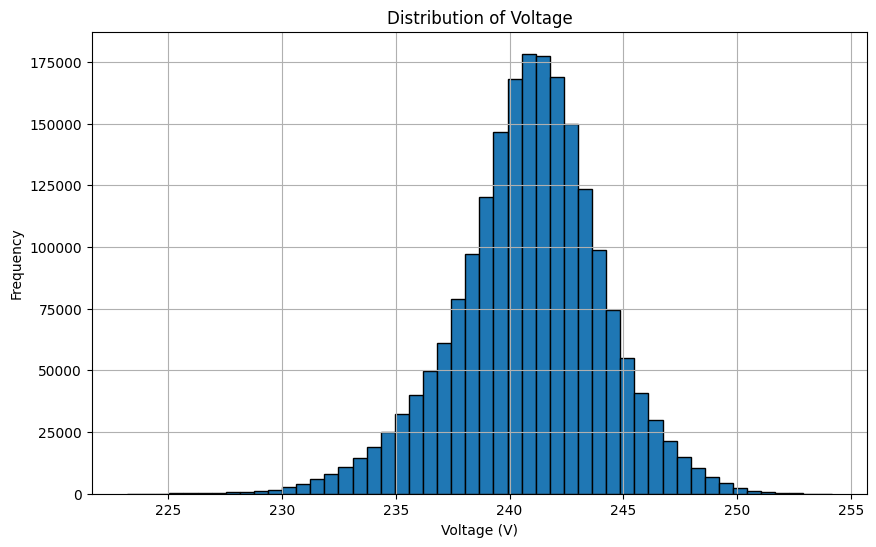

In [36]:
import matplotlib.pyplot as plt

# Ensure 'Voltage' column is numeric
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')

# Drop rows with NaN values in 'Voltage' if any resulted from coercion
df.dropna(subset=['Voltage'], inplace=True)

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Voltage'], bins=50, edgecolor='black')  # You can adjust the number of bins
plt.xlabel('Voltage (V)')
plt.ylabel('Frequency')
plt.title('Distribution of Voltage')
plt.grid(True)
plt.show()

# **08. Calcule o consumo médio por mês em todo o período disponível no dataset.**

In [37]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_avg_power = df.groupby('Month')['Global_active_power'].mean()
display(monthly_avg_power)

,Global_active_power
Month,
2006-12,1.901295
2007-01,1.546034
2007-02,1.401084
2007-03,1.318627
2007-04,0.891189
2007-05,0.985862
2007-06,0.826814
2007-07,0.667367
2007-08,0.764186


# **09. Identifique o dia com maior consumo de energia ativa global (Global_active_power).**

In [38]:
daily_power_sum = df.groupby('Date')['Global_active_power'].sum()
day_with_highest_consumption = daily_power_sum.idxmax()
highest_consumption_value = daily_power_sum.max()

print(f"O dia com maior consumo de energia ativa global é: {day_with_highest_consumption.strftime('%Y-%m-%d')}")
print(f"Valor do maior consumo: {highest_consumption_value:.2f} kW")

O dia com maior consumo de energia ativa global é: 2006-12-23
Valor do maior consumo: 4773.39 kW


# **10. Compare o consumo médio de energia ativa global em dias de semana versus finais de semana.**

In [39]:
df['DayType'] = df['DayOfWeek'].apply(lambda x: 'Final de semana' if x in ['Saturday', 'Sunday'] else 'Dia de semana')

# Calculate the average Global_active_power for each day type
average_power_by_daytype = df.groupby('DayType')['Global_active_power'].mean()

display(average_power_by_daytype)

,Global_active_power
DayType,
Dia de semana,1.035472
Final de semana,1.234232


# ***15. Compare o consumo entre os meses de verão e inverno (no hemisfério norte).***

In [40]:
summer_months = [6, 7, 8]
df_summer = df[df['Date'].dt.month.isin(summer_months)]

average_power_summer = df_summer['Global_active_power'].mean()

winter_months = [12, 1, 2]
df_winter = df[df['Date'].dt.month.isin(winter_months)]

average_power_winter = df_winter['Global_active_power'].mean()

print(f"Consumo médio de energia ativa global no verão (Hemisfério Norte): {average_power_summer:.2f} kW")
print(f"Consumo médio de energia ativa global no inverno (Hemisfério Norte): {average_power_winter:.2f} kW")

Consumo médio de energia ativa global no verão (Hemisfério Norte): 0.73 kW
Consumo médio de energia ativa global no inverno (Hemisfério Norte): 1.42 kW


# ***16. Aplique uma amostragem aleatória de 1% dos dados e verifique se a distribuição de Global_active_power é semelhante à da base completa***

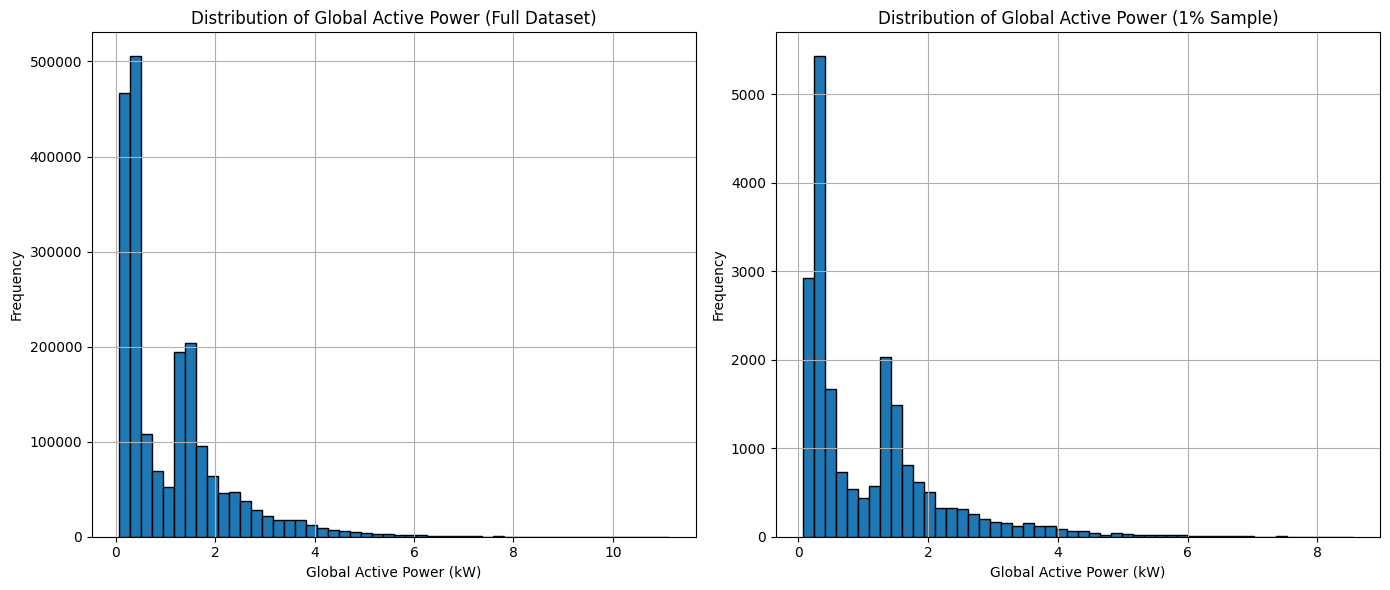

In [41]:
df_sample = df.sample(frac=0.01, random_state=42)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Global_active_power'], bins=50, edgecolor='black')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Frequency')
plt.title('Distribution of Global Active Power (Full Dataset)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(df_sample['Global_active_power'], bins=50, edgecolor='black')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Frequency')
plt.title('Distribution of Global Active Power (1% Sample)')
plt.grid(True)

plt.tight_layout()

# ***17. Utilize uma técnica de normalização (Min-Max Scaling) para padronizar as variáveis numéricas principais.***



In [42]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

scaler = MinMaxScaler()

df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

display(df_scaled.head())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DayOfWeek,Month,DayType
0,2006-12-16,17:24:00,0.374796,0.300719,0.376090,0.377593,0.0,0.0125,0.548387,Saturday,2006-12,Final de semana
1,2006-12-16,17:25:00,0.478363,0.313669,0.336995,0.473029,0.0,0.0125,0.516129,Saturday,2006-12,Final de semana
2,2006-12-16,17:26:00,0.479631,0.358273,0.326010,0.473029,0.0,0.0250,0.548387,Saturday,2006-12,Final de semana
3,2006-12-16,17:27:00,0.480898,0.361151,0.340549,0.473029,0.0,0.0125,0.548387,Saturday,2006-12,Final de semana
4,2006-12-16,17:28:00,0.325005,0.379856,0.403231,0.323651,0.0,0.0125,0.548387,Saturday,2006-12,Final de semana


# ***18. Aplique K-means para segmentar os dias em 3 grupos distintos de consumo elétrico. Interprete os resultados.***

In [43]:
daily_consumption = df.groupby('Date')['Global_active_power'].sum().reset_index()
display(daily_consumption.head())

,Date,Global_active_power
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [44]:
daily_power = daily_consumption['Global_active_power']

X = daily_power.values.reshape(-1, 1)

print(f"Shape of the data for K-means: {X.shape}")

Shape of the data for K-means: (1433, 1)


In [45]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [46]:
daily_consumption['Cluster'] = kmeans.labels_
display(daily_consumption.head())

,Date,Global_active_power,Cluster
0,2006-12-16,1209.176,0
1,2006-12-17,3390.460,1
2,2006-12-18,2203.826,1
3,2006-12-19,1666.194,2
4,2006-12-20,2225.748,1


Average Global Active Power per Cluster:


,Global_active_power
Cluster,
0,948.238891
1,2550.739361
2,1680.531847


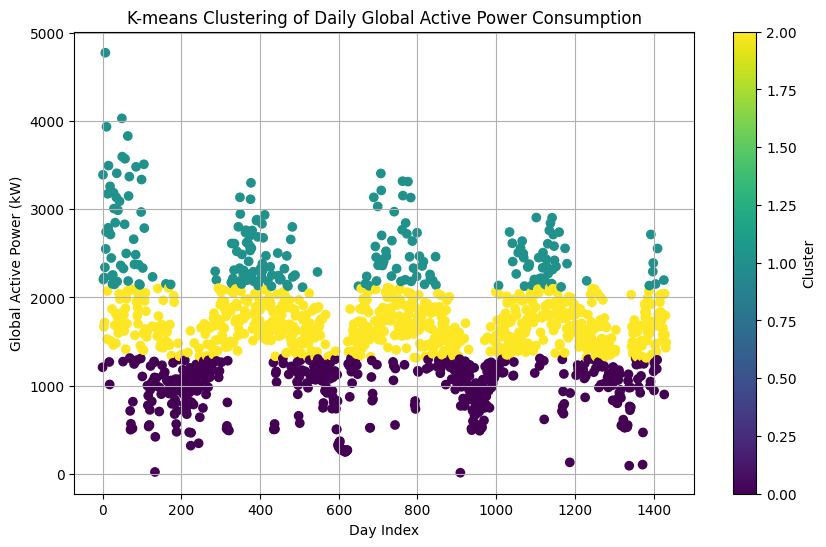

In [47]:
average_consumption_per_cluster = daily_consumption.groupby('Cluster')['Global_active_power'].mean()

print("Average Global Active Power per Cluster:")
display(average_consumption_per_cluster)

plt.figure(figsize=(10, 6))
plt.scatter(daily_consumption.index, daily_consumption['Global_active_power'], c=daily_consumption['Cluster'], cmap='viridis')
plt.xlabel('Day Index')
plt.ylabel('Global Active Power (kW)')
plt.title('K-means Clustering of Daily Global Active Power Consumption')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# ***19. Realize uma decomposição de série temporal (tendência, sazonalidade e resíduo) para Global_active_power em um período de 6 meses.*`**

In [48]:
df['Date'] = pd.to_datetime(df['Date'])

start_date = '2007-01-01'
end_date = '2007-06-30'

df_period = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].copy()

display(df_period.head())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DayOfWeek,Month,DayType
21996,2007-01-01,00:00:00,2.580,0.136,241.97,10.600,0.000,0.000,0.0,Monday,2007-01,Dia de semana
21997,2007-01-01,00:01:00,2.552,0.100,241.75,10.400,0.000,0.000,0.0,Monday,2007-01,Dia de semana
21998,2007-01-01,00:02:00,2.550,0.100,241.64,10.400,0.000,0.000,0.0,Monday,2007-01,Dia de semana
21999,2007-01-01,00:03:00,2.550,0.100,241.71,10.400,0.000,0.000,0.0,Monday,2007-01,Dia de semana
22000,2007-01-01,00:04:00,2.554,0.100,241.98,10.400,0.000,0.000,0.0,Monday,2007-01,Dia de semana


In [49]:
df_period['Datetime'] = pd.to_datetime(df_period['Date'].astype(str) + ' ' + df_period['Time'])
df_period.set_index('Datetime', inplace=True)

daily_power_series = df_period['Global_active_power'].resample('D').mean()

display(daily_power_series.head())

,Global_active_power
Datetime,
2007-01-01,1.909031
2007-01-02,0.881414
2007-01-03,0.704204
2007-01-04,2.263481
2007-01-05,1.884281


In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose

daily_power_series_filled = daily_power_series.interpolate()

decomposition = seasonal_decompose(daily_power_series_filled, model='additive', period=7)

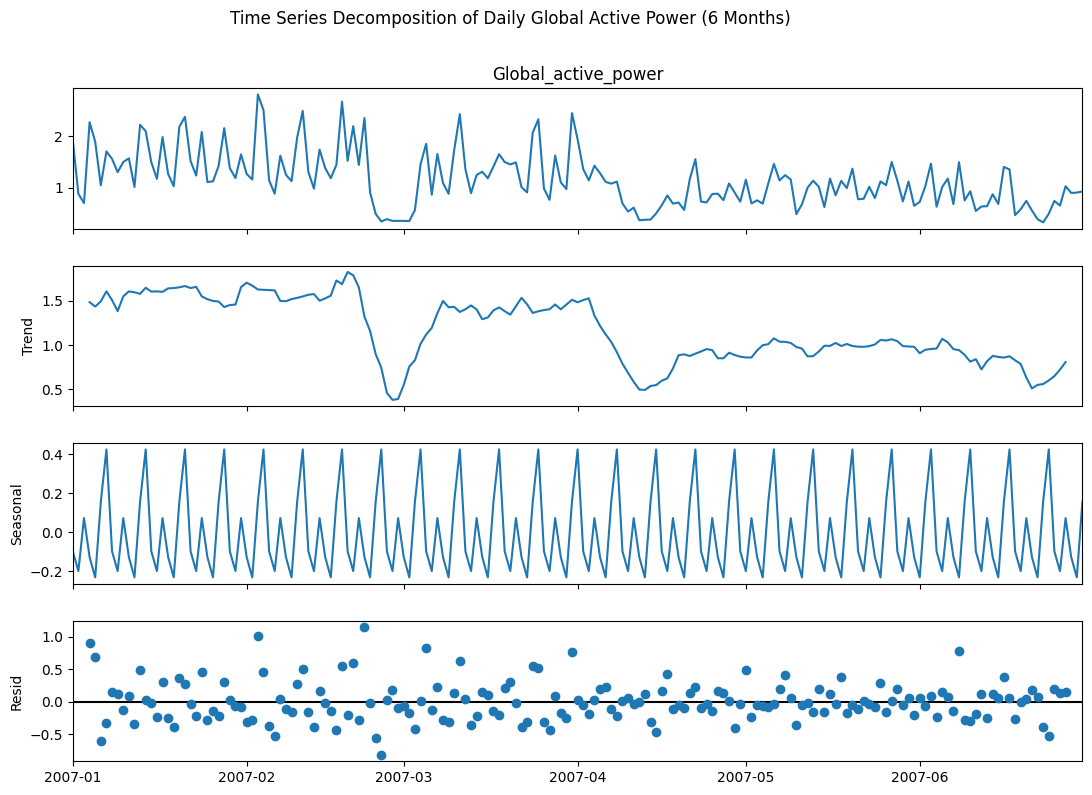

In [51]:
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle('Time Series Decomposition of Daily Global Active Power (6 Months)', y=1.02)
plt.show()

# ***20. Treine um modelo de regressão linear simples para prever Global_active_power a partir de Global_intensity. Avalie o erro do modelo***

In [52]:
X = df[['Global_intensity']]
y = df['Global_active_power']

display(X.head())
display(y.head())

,Global_intensity
0,18.400
1,23.000
2,23.000
3,23.000
4,15.800


,Global_active_power
0,4.216
1,5.360
2,5.374
3,5.388
4,3.666


In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (1639424, 1)
Shape of X_test: (409856, 1)
Shape of y_train: (1639424,)
Shape of y_test: (409856,)


In [54]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [55]:
y_pred = model.predict(X_test)

print("First 5 predictions:")
print(y_pred[:5])

First 5 predictions:
[1.51274978 0.41965701 0.70481164 0.32460546 1.32264669]


In [56]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Squared Error (MSE): 0.0025
R-squared (R2): 0.9978


# ***21***

In [57]:
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'], format='%Y-%m-%d %H:%M:%S')
df.set_index('Datetime', inplace=True)
df.drop(['Date', 'Time'], axis=1, inplace=True)
display(df.head())

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DayOfWeek,Month,DayType
Datetime,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.400,0.000,1.000,17.0,Saturday,2006-12,Final de semana
2006-12-16 17:25:00,5.360,0.436,233.63,23.000,0.000,1.000,16.0,Saturday,2006-12,Final de semana
2006-12-16 17:26:00,5.374,0.498,233.29,23.000,0.000,2.000,17.0,Saturday,2006-12,Final de semana
2006-12-16 17:27:00,5.388,0.502,233.74,23.000,0.000,1.000,17.0,Saturday,2006-12,Final de semana
2006-12-16 17:28:00,3.666,0.528,235.68,15.800,0.000,1.000,17.0,Saturday,2006-12,Final de semana


In [58]:
df_hourly = df['Global_active_power'].resample('H').mean()
display(df_hourly.head())

/tmp/ipython-input-2808851298.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df['Global_active_power'].resample('H').mean()


,Global_active_power
Datetime,
2006-12-16 17:00:00,4.222889
2006-12-16 18:00:00,3.632200
2006-12-16 19:00:00,3.400233
2006-12-16 20:00:00,3.268567
2006-12-16 21:00:00,3.056467


In [59]:
df_hourly = df['Global_active_power'].resample('H').mean()
hourly_avg_power = df_hourly.groupby(df_hourly.index.hour).mean()
peak_hours = hourly_avg_power.sort_values(ascending=False)
display(peak_hours)

/tmp/ipython-input-4128400018.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df['Global_active_power'].resample('H').mean()


,Global_active_power
Datetime,
20,1.899073
21,1.876063
19,1.733428
7,1.502373
8,1.460940
22,1.412681
9,1.331642
18,1.326433
10,1.260913


# ***22***

In [64]:
from statsmodels.tsa.stattools import acf

# Calculate autocorrelation at lag 1
autocorr_lag1 = acf(df_hourly, nlags=1)[1]

# Calculate autocorrelation at lag 24
autocorr_lag24 = acf(df_hourly, nlags=24)[24]

# Calculate autocorrelation at lag 48
autocorr_lag48 = acf(df_hourly, nlags=48)[48]

# Print the autocorrelation values
print(f"Autocorrelation at lag 1 hour: {autocorr_lag1:.4f}")
print(f"Autocorr elation at lag 24 hours: {autocorr_lag24:.4f}")
print(f"Autocorrelation at lag 48 hours: {autocorr_lag48:.4f}")

Autocorrelation at lag 1 hour: nan
Autocorr elation at lag 24 hours: nan
Autocorrelation at lag 48 hours: nan


In [61]:
from statsmodels.tsa.stattools import acf

# Calculate autocorrelation at lag 1
autocorr_lag1 = acf(df_hourly, nlags=1)[1]

# Calculate autocorrelation at lag 24
autocorr_lag24 = acf(df_hourly, nlags=24)[24]

# Calculate autocorrelation at lag 48
autocorr_lag48 = acf(df_hourly, nlags=48)[48]

# Print the autocorrelation values
print(f"Autocorrelation at lag 1 hour: {autocorr_lag1:.4f}")
print(f"Autocorrelation at lag 24 hours: {autocorr_lag24:.4f}")
print(f"Autocorrelation at lag 48 hours: {autocorr_lag48:.4f}")

Autocorrelation at lag 1 hour: nan
Autocorrelation at lag 24 hours: nan
Autocorrelation at lag 48 hours: nan


In [62]:
# Handle missing values in the hourly time series by interpolating
df_hourly_filled = df_hourly.interpolate(method='linear')

# Calculate autocorrelation at lag 1
autocorr_lag1 = acf(df_hourly_filled, nlags=1)[1]

# Calculate autocorrelation at lag 24
autocorr_lag24 = acf(df_hourly_filled, nlags=24)[24]

# Calculate autocorrelation at lag 48
autocorr_lag48 = acf(df_hourly_filled, nlags=48)[48]

# Print the autocorrelation values
print(f"Autocorrelation at lag 1 hour: {autocorr_lag1:.4f}")
print(f"Autocorrelation at lag 24 hours: {autocorr_lag24:.4f}")
print(f"Autocorrelation at lag 48 hours: {autocorr_lag48:.4f}")

Autocorrelation at lag 1 hour: 0.7157
Autocorrelation at lag 24 hours: 0.4356
Autocorrelation at lag 48 hours: 0.3981


In [63]:
print("Interpretation of Autocorrelation Values:")
print(f"- Autocorrelation at lag 1 hour ({autocorr_lag1:.4f}): This value is relatively high and positive. It indicates a strong positive correlation between the global active power consumption at a given hour and the consumption in the previous hour. This suggests that energy consumption tends to be similar from one hour to the next.")
print(f"- Autocorrelation at lag 24 hours ({autocorr_lag24:.4f}): This value is also positive and moderately high, though lower than at lag 1. A positive autocorrelation at lag 24 suggests a positive correlation between the power consumption at a given hour and the consumption exactly 24 hours prior (the same hour on the previous day). This is a strong indicator of a daily repeating pattern in energy consumption.")
print(f"- Autocorrelation at lag 48 hours ({autocorr_lag48:.4f}): This value is positive but slightly lower than at lag 24. It indicates a positive correlation between the power consumption at a given hour and the consumption 48 hours prior (the same hour two days prior). The fact that it's still positive and somewhat high further supports the presence of recurring patterns, although potentially with slightly less strong correlation than the immediate daily lag.")

print("\nConclusion:")
print("Based on the autocorrelation values, particularly the significant positive value at lag 24 hours, there are noticeable daily repeating patterns in the Global_active_power time series. The energy consumption tends to follow a similar pattern each day, with consumption at a specific hour being positively correlated with the consumption at the same hour on the previous day.")

Interpretation of Autocorrelation Values:
- Autocorrelation at lag 1 hour (0.7157): This value is relatively high and positive. It indicates a strong positive correlation between the global active power consumption at a given hour and the consumption in the previous hour. This suggests that energy consumption tends to be similar from one hour to the next.
- Autocorrelation at lag 24 hours (0.4356): This value is also positive and moderately high, though lower than at lag 1. A positive autocorrelation at lag 24 suggests a positive correlation between the power consumption at a given hour and the consumption exactly 24 hours prior (the same hour on the previous day). This is a strong indicator of a daily repeating pattern in energy consumption.
- Autocorrelation at lag 48 hours (0.3981): This value is positive but slightly lower than at lag 24. It indicates a positive correlation between the power consumption at a given hour and the consumption 48 hours prior (the same hour two days prio

# ***Pergunta: existem padrões repetidos diariamente?***


Com base nos valores de autocorrelação, particularmente o valor positivo significativo no lag de 24 horas, existem padrões diários repetidos notáveis na série temporal de Global_active_power. O consumo de energia tende a seguir um padrão semelhante a cada dia, com o consumo em uma hora específica sendo positivamente correlacionado com o consumo na mesma hora do dia anterior.

# ***23***

In [65]:
features = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']]
display(features.head())

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
Datetime,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.400
2006-12-16 17:25:00,5.360,0.436,233.63,23.000
2006-12-16 17:26:00,5.374,0.498,233.29,23.000
2006-12-16 17:27:00,5.388,0.502,233.74,23.000
2006-12-16 17:28:00,3.666,0.528,235.68,15.800


In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)

df_pca = pd.DataFrame(pca.fit_transform(features), columns=['PC1', 'PC2'])
display(df_pca.head())

,PC1,PC2
0,15.337619,0.468435
1,20.148362,1.355780
2,20.294107,1.048639
3,20.108530,1.458663
4,12.574047,0.118703


In [67]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio of each component:")
print(explained_variance_ratio)

cumulative_explained_variance = explained_variance_ratio.sum()
print(f"\nCumulative explained variance ratio of the first two components: {cumulative_explained_variance:.4f}")

Explained variance ratio of each component:
[0.75442158 0.24513217]

Cumulative explained variance ratio of the first two components: 0.9996


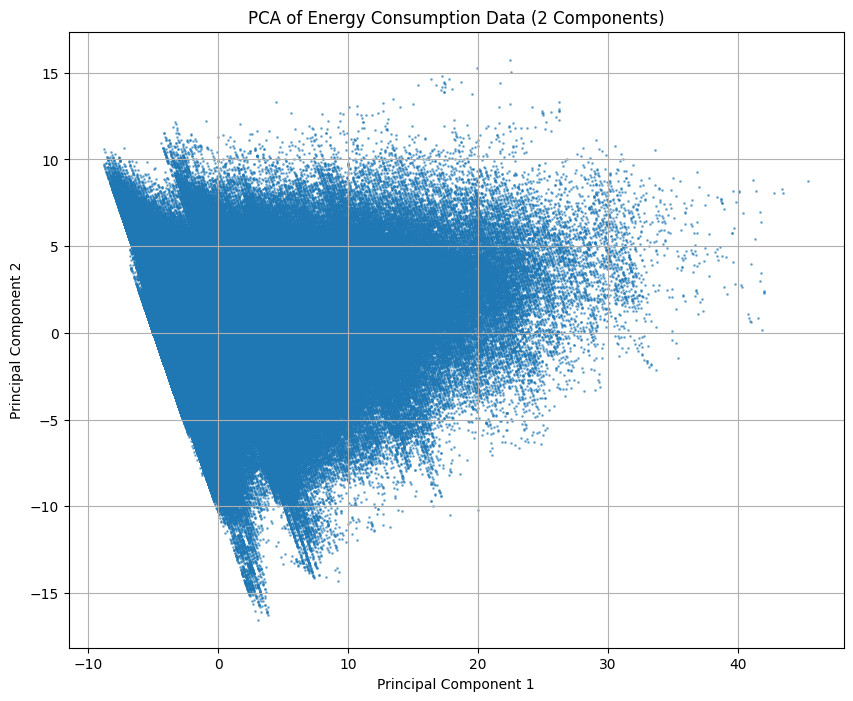

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5, s=1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Energy Consumption Data (2 Components)')
plt.grid(True)
plt.show()

# ***24***

In [69]:
# The daily_consumption dataframe contains the cluster labels for each day (indexed by Date).
# The df_pca dataframe contains the PCA components for each minute (indexed by Datetime).
# We need to map the daily cluster labels to the minute-level PCA results.
# First, ensure the daily_consumption index is aligned by Date
daily_consumption_indexed = daily_consumption.set_index('Date')

# Map the daily cluster labels to the original dataframe based on Date
df['Cluster'] = df.index.normalize().map(daily_consumption_indexed['Cluster'])

# Merge the cluster labels with the PCA results dataframe using the original dataframe's index
df_pca = df_pca.set_index(df.index)
df_pca['Cluster'] = df['Cluster']

# Drop rows where Cluster is NaN (due to missing dates in daily_consumption or df_pca)
df_pca.dropna(subset=['Cluster'], inplace=True)

# Convert the Cluster column to integer type
df_pca['Cluster'] = df_pca['Cluster'].astype(int)

display(df_pca.head())

,PC1,PC2,Cluster
Datetime,,,
2006-12-16 17:24:00,15.337619,0.468435,0
2006-12-16 17:25:00,20.148362,1.355780,0
2006-12-16 17:26:00,20.294107,1.048639,0
2006-12-16 17:27:00,20.108530,1.458663,0
2006-12-16 17:28:00,12.574047,0.118703,0


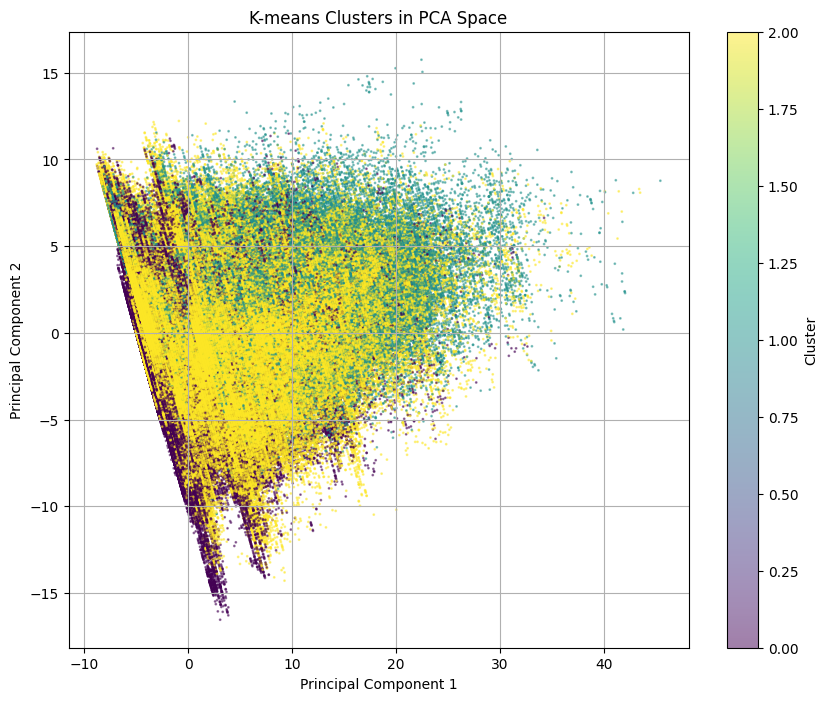

In [70]:
plt.figure(figsize=(10, 8))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', s=1, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clusters in PCA Space')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# ***Os grupos se separam?***

Observando o gráfico de dispersão dos clusters de K-means no espaço ACP, os grupos não parecem estar claramente separados. Há uma sobreposição significativa entre os clusters, sugerindo que as características usadas para o agrupamento, quando reduzidas a dois componentes principais, não diferenciam os grupos de forma distinta.

# ***25***

In [71]:
from sklearn.model_selection import train_test_split

features_voltage = df[['Voltage']]
target_power = df['Global_active_power']

X_train_voltage, X_test_voltage, y_train_power, y_test_power = train_test_split(
    features_voltage, target_power, test_size=0.2, random_state=42
)

print(f"Shape of X_train_voltage: {X_train_voltage.shape}")
print(f"Shape of X_test_voltage: {X_test_voltage.shape}")
print(f"Shape of y_train_power: {y_train_power.shape}")
print(f"Shape of y_test_power: {y_test_power.shape}")

Shape of X_train_voltage: (1639424, 1)
Shape of X_test_voltage: (409856, 1)
Shape of y_train_power: (1639424,)
Shape of y_test_power: (409856,)


In [72]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_voltage, y_train_power)

LinearRegression()

In [73]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2)

X_train_voltage_poly = poly_features.fit_transform(X_train_voltage)
X_test_voltage_poly = poly_features.transform(X_test_voltage)

poly_model = LinearRegression()
poly_model.fit(X_train_voltage_poly, y_train_power)

LinearRegression()

In [74]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate predictions for the linear model
y_pred_linear = linear_model.predict(X_test_voltage)

# Calculate RMSE for the linear model
rmse_linear = np.sqrt(mean_squared_error(y_test_power, y_pred_linear))

# Calculate predictions for the polynomial model
y_pred_poly = poly_model.predict(X_test_voltage_poly)

# Calculate RMSE for the polynomial model
rmse_poly = np.sqrt(mean_squared_error(y_test_power, y_pred_poly))

# Print the RMSE values
print(f"Root Mean Squared Error (RMSE) for Linear Model: {rmse_linear:.4f}")
print(f"Root Mean Squared Error (RMSE) for Polynomial Model: {rmse_poly:.4f}")

Root Mean Squared Error (RMSE) for Linear Model: 0.9719
Root Mean Squared Error (RMSE) for Polynomial Model: 0.9674


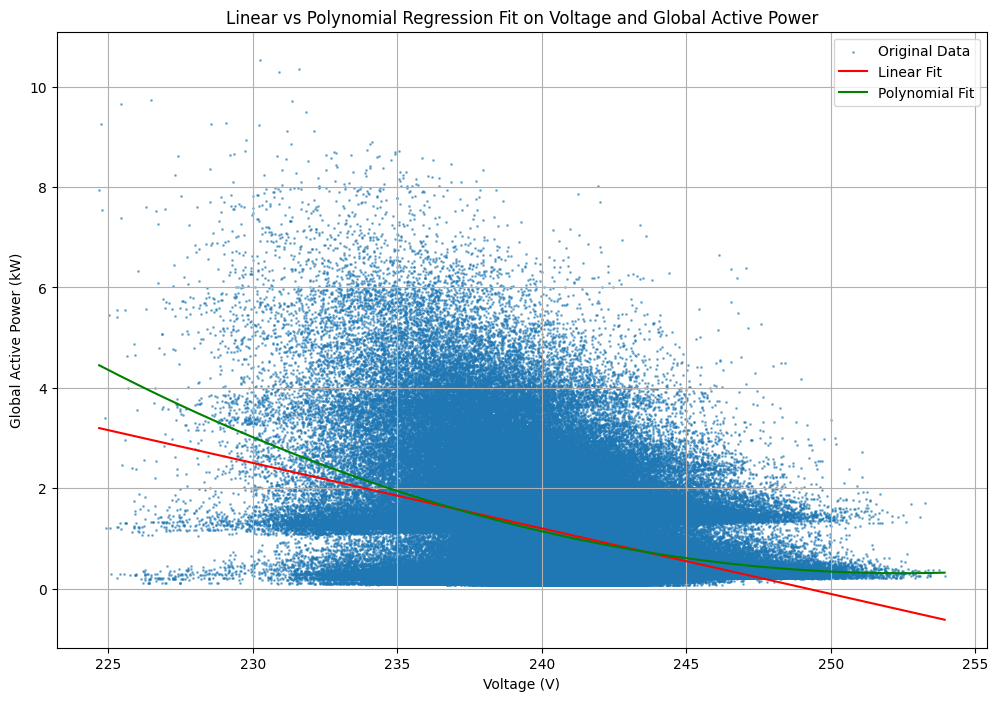

In [75]:
import matplotlib.pyplot as plt

# Create a scatter plot of the test data
plt.figure(figsize=(12, 8))
plt.scatter(X_test_voltage, y_test_power, alpha=0.5, s=1, label='Original Data')

# Sort X_test_voltage for smooth line plotting
X_test_voltage_sorted = X_test_voltage.sort_values(by='Voltage')

# Predict using the linear model on the sorted test data
y_pred_linear_sorted = linear_model.predict(X_test_voltage_sorted)

# Predict using the polynomial model on the sorted, transformed test data
X_test_voltage_sorted_poly = poly_features.transform(X_test_voltage_sorted)
y_pred_poly_sorted = poly_model.predict(X_test_voltage_sorted_poly)

# Plot the fitted linear regression line
plt.plot(X_test_voltage_sorted, y_pred_linear_sorted, color='red', label='Linear Fit')

# Plot the fitted polynomial regression line
plt.plot(X_test_voltage_sorted, y_pred_poly_sorted, color='green', label='Polynomial Fit')

# Add labels and title
plt.xlabel('Voltage (V)')
plt.ylabel('Global Active Power (kW)')
plt.title('Linear vs Polynomial Regression Fit on Voltage and Global Active Power')
plt.legend()
plt.grid(True)
plt.show()

In [76]:
# Compare the calculated RMSE values
print(f"Comparison of Model Performance (RMSE):")
print(f"Linear Model RMSE: {rmse_linear:.4f}")
print(f"Polynomial Model RMSE: {rmse_poly:.4f}")

# Determine which model has lower error based on RMSE
if rmse_poly < rmse_linear:
    print("\nThe Polynomial Regression model has a lower RMSE and provides a slightly better fit based on this metric.")
elif rmse_linear < rmse_poly:
    print("\nThe Linear Regression model has a lower RMSE and provides a slightly better fit based on this metric.")
else:
    print("\nBoth models have the same RMSE.")

# Interpret the visual comparison from the previously generated plot
print("\nVisual Interpretation of Fitted Curves:")
print("Looking at the plot, the linear regression model fits a straight line through the data. This line captures the general trend but doesn't follow the nuances of the data distribution.")
print("The polynomial regression model (degree 2) fits a curve to the data. This curve appears to follow the distribution of the data points more closely than the straight line, especially in areas where the data shows a slight curvature.")
print("Based on the visual inspection, the polynomial model seems to capture the relationship between Voltage and Global_active_power better than the simple linear model.")

# Synthesize findings
print("\nOverall Conclusion:")
print("Both the quantitative (RMSE) and qualitative (visual) evaluations suggest that the polynomial regression model provides a slightly better fit to the data for predicting Global_active_power based on Voltage compared to the simple linear regression model. The lower RMSE value and the visually better-fitting curve indicate that incorporating a polynomial term for Voltage improves the model's ability to capture the underlying pattern.")

Comparison of Model Performance (RMSE):
Linear Model RMSE: 0.9719
Polynomial Model RMSE: 0.9674

The Polynomial Regression model has a lower RMSE and provides a slightly better fit based on this metric.

Visual Interpretation of Fitted Curves:
Looking at the plot, the linear regression model fits a straight line through the data. This line captures the general trend but doesn't follow the nuances of the data distribution.
The polynomial regression model (degree 2) fits a curve to the data. This curve appears to follow the distribution of the data points more closely than the straight line, especially in areas where the data shows a slight curvature.
Based on the visual inspection, the polynomial model seems to capture the relationship between Voltage and Global_active_power better than the simple linear model.

Overall Conclusion:
Both the quantitative (RMSE) and qualitative (visual) evaluations suggest that the polynomial regression model provides a slightly better fit to the data for